In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_excel('usefile.xlsx')

In [3]:
df.head(10)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
5,0,14.0,0,0,0,1,0,161.28,19.1,0,0
6,1,52.0,0,0,1,2,1,77.59,17.7,1,0
7,1,75.0,0,1,1,3,0,243.53,27.0,0,0
8,1,32.0,0,0,1,2,0,77.67,32.3,2,0
9,1,74.0,1,0,1,3,1,205.84,54.6,0,0


<AxesSubplot:>

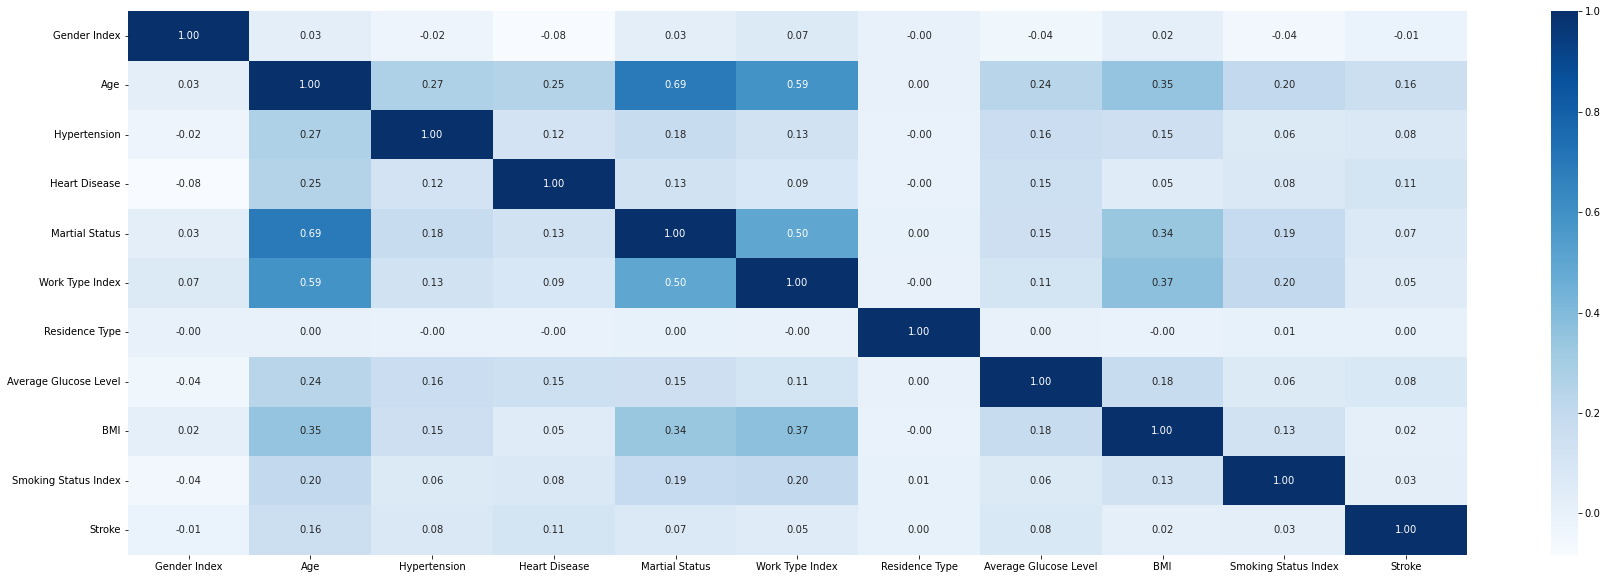

In [4]:
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [5]:
X = df.drop('Stroke',axis=1)
X.head(5)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index
0,0,3.0,0,0,0,0,0,95.12,18.0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1
4,1,47.0,0,0,1,2,1,210.95,50.1,0


In [6]:
y = df['Stroke']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Stroke, dtype: int64

In [7]:
X.shape

(43400, 10)

In [8]:
y.shape

(43400,)

## Split Data 

In [9]:
#trained data is not validated,trained data may/may not represent whole dataset or vice versa
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [10]:
X_test.shape

(8680, 10)

In [11]:
X_train.shape

(34720, 10)

## KNN Without Validation

In [12]:
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [13]:
scale = StandardScaler()

In [14]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [15]:
X_train_scaled

array([[ 0.82969259,  1.32213599, -0.3222331 , ..., -0.71882026,
        -0.6875417 ,  0.71218423],
       [ 0.82969259, -0.93854822, -0.3222331 , ..., -0.39099967,
        -1.41014335, -0.63806076],
       [-1.20239874,  1.5437717 , -0.3222331 , ..., -0.90813491,
        -0.10946038,  0.71218423],
       ...,
       [ 0.82969259,  1.76540741, -0.3222331 , ..., -1.04803287,
        -0.63498885,  0.71218423],
       [-1.20239874,  0.56857459, -0.3222331 , ..., -0.03255466,
         1.19122259, -0.63806076],
       [ 0.82969259,  1.36646313,  3.10334351, ..., -0.85895022,
         0.56058843,  0.71218423]])

In [16]:
X_test_scaled

array([[ 0.82889999,  1.77139637, -0.3175285 , ..., -0.97004291,
         0.39483603, -0.64540635],
       [-1.20526793,  1.1899273 , -0.3175285 , ..., -0.66408654,
         0.70452884, -0.64540635],
       [ 0.82889999, -0.95703543, -0.3175285 , ..., -0.24640975,
         0.4851631 ,  2.01593669],
       ...,
       [-1.20526793, -0.42029475,  3.14932358, ..., -0.45617529,
         0.4851631 , -0.64540635],
       [-1.20526793, -1.00176382, -0.3175285 , ..., -0.88428241,
        -0.572954  , -0.64540635],
       [-1.20526793,  0.29535949,  3.14932358, ..., -0.57577641,
         1.67231888, -0.64540635]])

In [17]:
knn_v = knn_1.fit(X_train_scaled,y_train)

In [18]:
y_pred = knn_1.predict(X_test_scaled)

In [19]:
val = accuracy_score(y_test,y_pred)*100
val = round(val,4)
val

98.4332

In [20]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8544,    3],
       [ 133,    0]], dtype=int64)

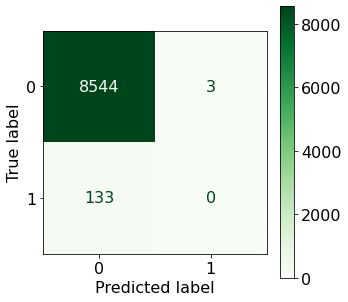

In [21]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_1.classes_,)
disp.plot(cmap='Greens')

In [22]:
knn_1.score(X_test_scaled,y_test)

0.9843317972350231

In [23]:
knn_1.score(X_train_scaled,y_train)

0.9815668202764977

## Knn_1 Training score : 98.16 and Testing Score : 98.43

## Error calculation

In [24]:
#Mean Abs Error
print(f"Mean Abs Error = {mean_absolute_error(y_test,y_pred)}")

Mean Abs Error = 0.01566820276497696


In [25]:
#Mean Sq Error
print(f"Mean Sq Error = {mean_squared_error(y_test,y_pred)}")

Mean Sq Error = 0.01566820276497696


In [26]:
#Mean Sq Error
print(f"Root Mean Sq Error = {np.sqrt(mean_squared_error(y_test,y_pred))}")

Root Mean Sq Error = 0.12517269177011797


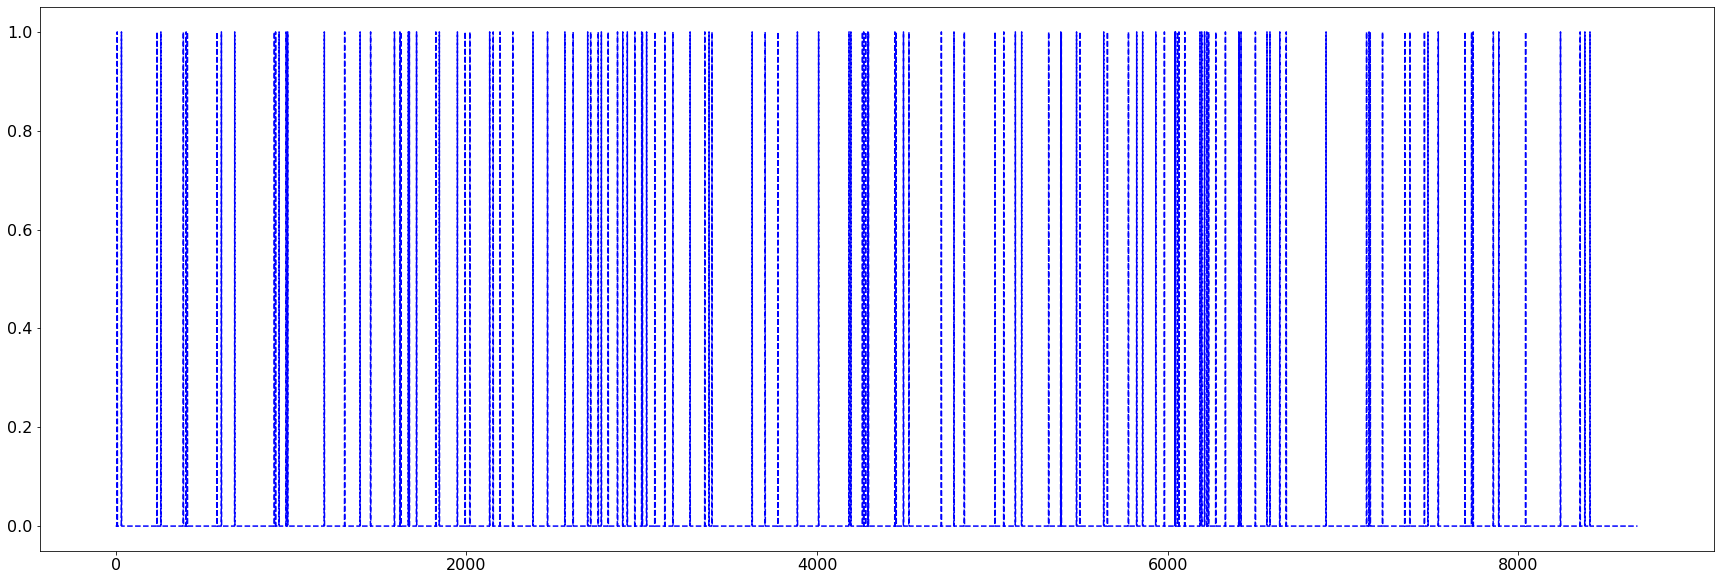

In [27]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'blue', linestyle = '--')


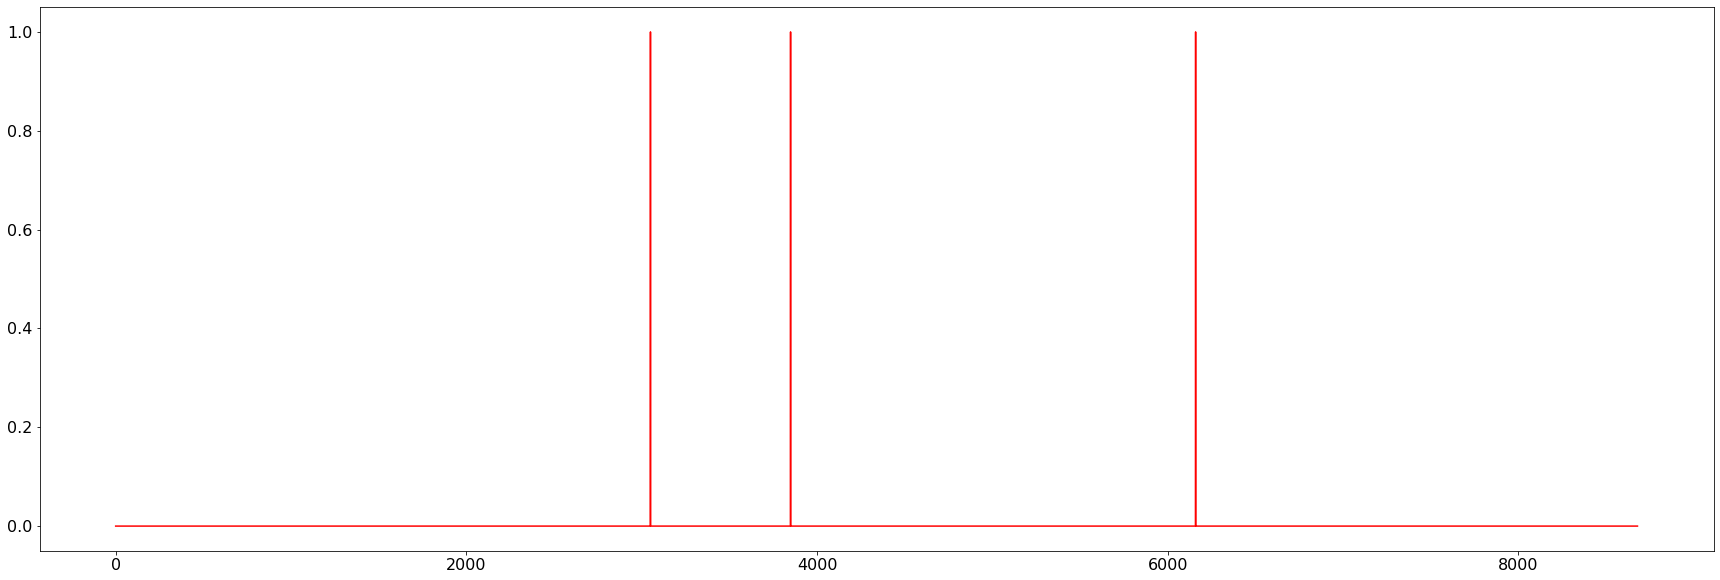

In [28]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_pred, label = 'Predicted', color = 'red', linestyle = '-')

## KNN with Cross Validation

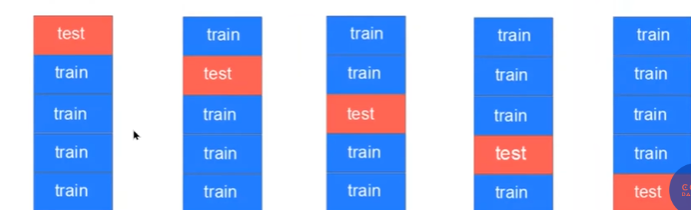

Split Data in 80:20. 

This is done for 5 times. 

5 Fold-Cross Validation

In K Folds. take x fold (1<=x<=k) as test fold, rest k-1 as train folds and checking for test accuracy

Average out these test accuracy as estimate of sample accuracy

In [29]:
knn_2 = KNeighborsClassifier(n_neighbors=5)

In [30]:
#10 Fold Cross Validation 
scores = cross_val_score(knn_2, X, y,cv = 10, scoring = 'accuracy')

In [31]:
scores = [ 100* round(elem, 4) for elem in scores ]
print(scores)

[98.18, 98.09, 98.18, 98.22999999999999, 98.16, 98.16, 98.16, 98.13, 98.18, 98.11]


In [32]:
est_score = np.array(scores).mean()
print(est_score)

98.158


In [33]:
k_range = range(1, 30) #KNN (k) values
k_scores = []

for k in k_range:
    knn_3 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_3, X, y,cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())
    

In [34]:
k_scores = [ 100* round(elem, 4) for elem in k_scores ]
print(k_scores)

[96.67, 98.11999999999999, 98.0, 98.18, 98.15, 98.19, 98.18, 98.19, 98.19, 98.19, 98.19, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2, 98.2]


<AxesSubplot:>

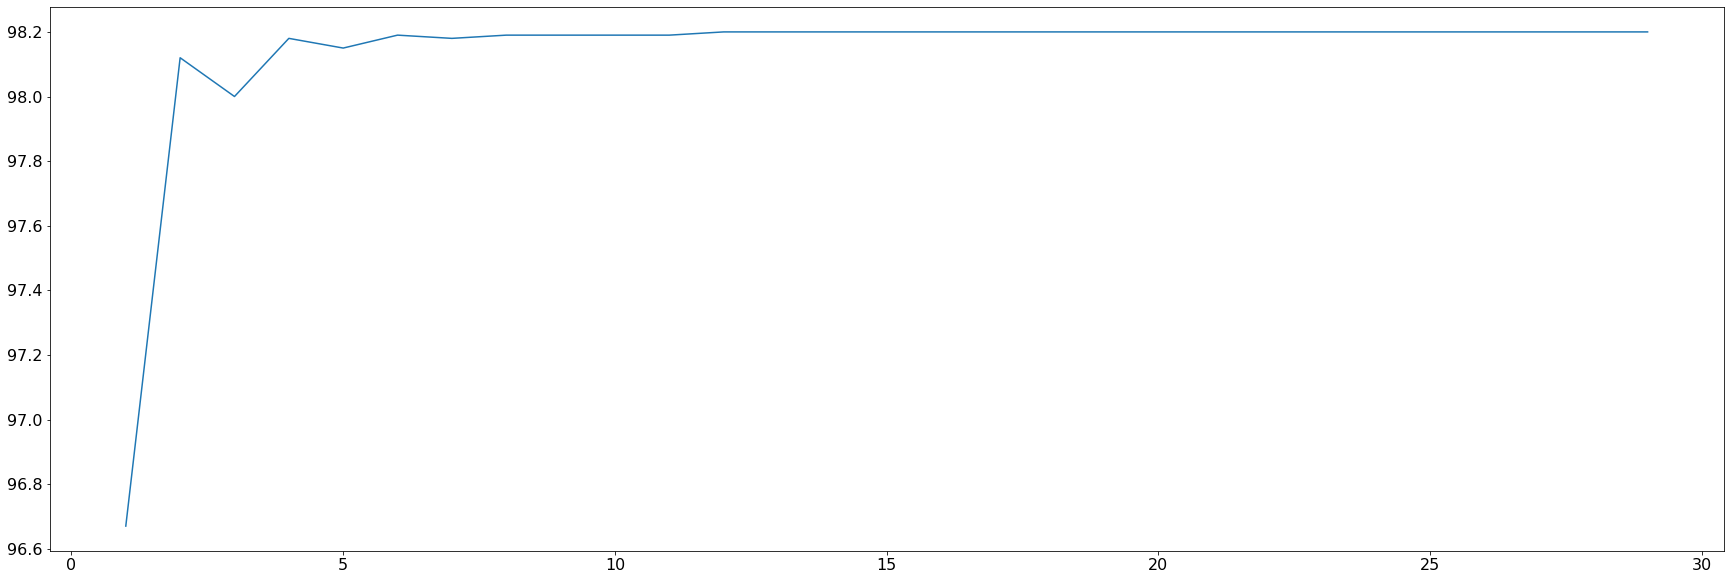

In [35]:
sns.lineplot(x=k_range,y=k_scores)

In [36]:
#k-neighbour classifier is more  accurate after k = 10. for 5-fold cross validation

In [37]:
#value of k = low => high variance, low bias (overfitting)

## Feature Importance

In [40]:
import catboost as cb

In [39]:
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 1.5 MB/s eta 0:00:00


In [41]:
train_dataset = cb.Pool(X_train_scaled, y_train) 
test_dataset = cb.Pool(X_test_scaled, y_test)

In [42]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [48]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train_scaled,
                  label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test_scaled,
                  label=y_test)

In [49]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cat_model.fit( X_train_scaled, y_train,
              
               eval_set=(X_test_scaled, y_test),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.088872
0:	learn: 0.1350609	test: 0.1224472	best: 0.1224472 (0)	total: 7.47ms	remaining: 7.46s
1:	learn: 0.1346205	test: 0.1220935	best: 0.1220935 (1)	total: 13.3ms	remaining: 6.64s
2:	learn: 0.1342366	test: 0.1218100	best: 0.1218100 (2)	total: 20.1ms	remaining: 6.7s
3:	learn: 0.1338874	test: 0.1215627	best: 0.1215627 (3)	total: 26.5ms	remaining: 6.61s
4:	learn: 0.1336533	test: 0.1214063	best: 0.1214063 (4)	total: 32.9ms	remaining: 6.54s
5:	learn: 0.1334202	test: 0.1212694	best: 0.1212694 (5)	total: 39.2ms	remaining: 6.5s
6:	learn: 0.1332093	test: 0.1211438	best: 0.1211438 (6)	total: 45.5ms	remaining: 6.46s
7:	learn: 0.1330172	test: 0.1210323	best: 0.1210323 (7)	total: 51.9ms	remaining: 6.43s
8:	learn: 0.1328690	test: 0.1209392	best: 0.1209392 (8)	total: 57.9ms	remaining: 6.37s
9:	learn: 0.1327216	test: 0.1208438	best: 0.1208438 (9)	total: 63.4ms	remaining: 6.28s
10:	learn: 0.1325830	test: 0.1207942	best: 0.1207942 (10)	total: 69.2ms	remaining: 6.22s
11:	learn: 0.

116:	learn: 0.1275921	test: 0.1210680	best: 0.1203839 (19)	total: 705ms	remaining: 5.32s
117:	learn: 0.1275747	test: 0.1210944	best: 0.1203839 (19)	total: 711ms	remaining: 5.31s
118:	learn: 0.1275330	test: 0.1210974	best: 0.1203839 (19)	total: 717ms	remaining: 5.31s
119:	learn: 0.1274796	test: 0.1211297	best: 0.1203839 (19)	total: 724ms	remaining: 5.31s
120:	learn: 0.1274595	test: 0.1211280	best: 0.1203839 (19)	total: 730ms	remaining: 5.3s
121:	learn: 0.1274013	test: 0.1211743	best: 0.1203839 (19)	total: 737ms	remaining: 5.3s
122:	learn: 0.1273578	test: 0.1211908	best: 0.1203839 (19)	total: 743ms	remaining: 5.3s
123:	learn: 0.1273230	test: 0.1211956	best: 0.1203839 (19)	total: 749ms	remaining: 5.29s
124:	learn: 0.1272937	test: 0.1211979	best: 0.1203839 (19)	total: 756ms	remaining: 5.29s
125:	learn: 0.1272727	test: 0.1211993	best: 0.1203839 (19)	total: 762ms	remaining: 5.29s
126:	learn: 0.1271984	test: 0.1211462	best: 0.1203839 (19)	total: 768ms	remaining: 5.28s
127:	learn: 0.1271606	te

226:	learn: 0.1238574	test: 0.1222047	best: 0.1203839 (19)	total: 1.42s	remaining: 4.84s
227:	learn: 0.1238120	test: 0.1222019	best: 0.1203839 (19)	total: 1.43s	remaining: 4.84s
228:	learn: 0.1237922	test: 0.1221926	best: 0.1203839 (19)	total: 1.44s	remaining: 4.83s
229:	learn: 0.1237670	test: 0.1221980	best: 0.1203839 (19)	total: 1.44s	remaining: 4.83s
230:	learn: 0.1237431	test: 0.1221977	best: 0.1203839 (19)	total: 1.45s	remaining: 4.83s
231:	learn: 0.1237138	test: 0.1222080	best: 0.1203839 (19)	total: 1.46s	remaining: 4.82s
232:	learn: 0.1236725	test: 0.1222089	best: 0.1203839 (19)	total: 1.46s	remaining: 4.82s
233:	learn: 0.1236450	test: 0.1222153	best: 0.1203839 (19)	total: 1.47s	remaining: 4.81s
234:	learn: 0.1236250	test: 0.1222210	best: 0.1203839 (19)	total: 1.48s	remaining: 4.81s
235:	learn: 0.1236084	test: 0.1222327	best: 0.1203839 (19)	total: 1.48s	remaining: 4.8s
236:	learn: 0.1235788	test: 0.1222312	best: 0.1203839 (19)	total: 1.49s	remaining: 4.8s
237:	learn: 0.1235553	t

330:	learn: 0.1213377	test: 0.1230068	best: 0.1203839 (19)	total: 2.13s	remaining: 4.31s
331:	learn: 0.1213155	test: 0.1230111	best: 0.1203839 (19)	total: 2.14s	remaining: 4.31s
332:	learn: 0.1212737	test: 0.1230327	best: 0.1203839 (19)	total: 2.15s	remaining: 4.3s
333:	learn: 0.1212493	test: 0.1230570	best: 0.1203839 (19)	total: 2.15s	remaining: 4.3s
334:	learn: 0.1212223	test: 0.1230637	best: 0.1203839 (19)	total: 2.16s	remaining: 4.29s
335:	learn: 0.1212109	test: 0.1230585	best: 0.1203839 (19)	total: 2.17s	remaining: 4.29s
336:	learn: 0.1211890	test: 0.1230469	best: 0.1203839 (19)	total: 2.18s	remaining: 4.28s
337:	learn: 0.1211732	test: 0.1230607	best: 0.1203839 (19)	total: 2.18s	remaining: 4.28s
338:	learn: 0.1211407	test: 0.1230681	best: 0.1203839 (19)	total: 2.19s	remaining: 4.27s
339:	learn: 0.1210982	test: 0.1230749	best: 0.1203839 (19)	total: 2.2s	remaining: 4.27s
340:	learn: 0.1210679	test: 0.1230900	best: 0.1203839 (19)	total: 2.21s	remaining: 4.26s
341:	learn: 0.1210387	te

434:	learn: 0.1188875	test: 0.1238442	best: 0.1203839 (19)	total: 2.85s	remaining: 3.7s
435:	learn: 0.1188836	test: 0.1238533	best: 0.1203839 (19)	total: 2.86s	remaining: 3.7s
436:	learn: 0.1188667	test: 0.1238570	best: 0.1203839 (19)	total: 2.87s	remaining: 3.69s
437:	learn: 0.1188414	test: 0.1238549	best: 0.1203839 (19)	total: 2.89s	remaining: 3.71s
438:	learn: 0.1187944	test: 0.1238820	best: 0.1203839 (19)	total: 2.9s	remaining: 3.7s
439:	learn: 0.1187868	test: 0.1238906	best: 0.1203839 (19)	total: 2.9s	remaining: 3.69s
440:	learn: 0.1187615	test: 0.1239071	best: 0.1203839 (19)	total: 2.91s	remaining: 3.69s
441:	learn: 0.1187209	test: 0.1239107	best: 0.1203839 (19)	total: 2.92s	remaining: 3.68s
442:	learn: 0.1186930	test: 0.1239191	best: 0.1203839 (19)	total: 2.92s	remaining: 3.67s
443:	learn: 0.1186805	test: 0.1239292	best: 0.1203839 (19)	total: 2.93s	remaining: 3.67s
444:	learn: 0.1186458	test: 0.1239302	best: 0.1203839 (19)	total: 2.93s	remaining: 3.66s
445:	learn: 0.1186297	test

536:	learn: 0.1168660	test: 0.1242930	best: 0.1203839 (19)	total: 3.56s	remaining: 3.07s
537:	learn: 0.1168461	test: 0.1242979	best: 0.1203839 (19)	total: 3.57s	remaining: 3.06s
538:	learn: 0.1168248	test: 0.1243081	best: 0.1203839 (19)	total: 3.57s	remaining: 3.06s
539:	learn: 0.1168160	test: 0.1243140	best: 0.1203839 (19)	total: 3.58s	remaining: 3.05s
540:	learn: 0.1167908	test: 0.1243221	best: 0.1203839 (19)	total: 3.59s	remaining: 3.04s
541:	learn: 0.1167837	test: 0.1243236	best: 0.1203839 (19)	total: 3.59s	remaining: 3.04s
542:	learn: 0.1167632	test: 0.1243974	best: 0.1203839 (19)	total: 3.6s	remaining: 3.03s
543:	learn: 0.1167374	test: 0.1244004	best: 0.1203839 (19)	total: 3.61s	remaining: 3.02s
544:	learn: 0.1167246	test: 0.1244007	best: 0.1203839 (19)	total: 3.61s	remaining: 3.02s
545:	learn: 0.1167097	test: 0.1244041	best: 0.1203839 (19)	total: 3.62s	remaining: 3.01s
546:	learn: 0.1166735	test: 0.1244158	best: 0.1203839 (19)	total: 3.63s	remaining: 3s
547:	learn: 0.1166514	tes

639:	learn: 0.1148365	test: 0.1248710	best: 0.1203839 (19)	total: 4.27s	remaining: 2.4s
640:	learn: 0.1148264	test: 0.1248660	best: 0.1203839 (19)	total: 4.28s	remaining: 2.4s
641:	learn: 0.1148171	test: 0.1248620	best: 0.1203839 (19)	total: 4.29s	remaining: 2.39s
642:	learn: 0.1148120	test: 0.1248698	best: 0.1203839 (19)	total: 4.29s	remaining: 2.38s
643:	learn: 0.1147959	test: 0.1249109	best: 0.1203839 (19)	total: 4.3s	remaining: 2.38s
644:	learn: 0.1147681	test: 0.1249217	best: 0.1203839 (19)	total: 4.31s	remaining: 2.37s
645:	learn: 0.1147455	test: 0.1249271	best: 0.1203839 (19)	total: 4.32s	remaining: 2.37s
646:	learn: 0.1147233	test: 0.1249487	best: 0.1203839 (19)	total: 4.32s	remaining: 2.36s
647:	learn: 0.1147140	test: 0.1249487	best: 0.1203839 (19)	total: 4.33s	remaining: 2.35s
648:	learn: 0.1147107	test: 0.1249499	best: 0.1203839 (19)	total: 4.34s	remaining: 2.35s
649:	learn: 0.1146999	test: 0.1249542	best: 0.1203839 (19)	total: 4.34s	remaining: 2.34s
650:	learn: 0.1146953	te

740:	learn: 0.1130825	test: 0.1253636	best: 0.1203839 (19)	total: 4.99s	remaining: 1.74s
741:	learn: 0.1130682	test: 0.1253633	best: 0.1203839 (19)	total: 5s	remaining: 1.74s
742:	learn: 0.1130513	test: 0.1253788	best: 0.1203839 (19)	total: 5s	remaining: 1.73s
743:	learn: 0.1130395	test: 0.1253792	best: 0.1203839 (19)	total: 5.01s	remaining: 1.72s
744:	learn: 0.1130361	test: 0.1253814	best: 0.1203839 (19)	total: 5.02s	remaining: 1.72s
745:	learn: 0.1130329	test: 0.1253836	best: 0.1203839 (19)	total: 5.03s	remaining: 1.71s
746:	learn: 0.1130114	test: 0.1254145	best: 0.1203839 (19)	total: 5.03s	remaining: 1.71s
747:	learn: 0.1130083	test: 0.1254166	best: 0.1203839 (19)	total: 5.04s	remaining: 1.7s
748:	learn: 0.1129895	test: 0.1254408	best: 0.1203839 (19)	total: 5.05s	remaining: 1.69s
749:	learn: 0.1129752	test: 0.1254557	best: 0.1203839 (19)	total: 5.06s	remaining: 1.69s
750:	learn: 0.1129723	test: 0.1254573	best: 0.1203839 (19)	total: 5.06s	remaining: 1.68s
751:	learn: 0.1129620	test: 

841:	learn: 0.1114893	test: 0.1259828	best: 0.1203839 (19)	total: 5.7s	remaining: 1.07s
842:	learn: 0.1114802	test: 0.1259848	best: 0.1203839 (19)	total: 5.71s	remaining: 1.06s
843:	learn: 0.1114734	test: 0.1259853	best: 0.1203839 (19)	total: 5.71s	remaining: 1.06s
844:	learn: 0.1114481	test: 0.1259987	best: 0.1203839 (19)	total: 5.72s	remaining: 1.05s
845:	learn: 0.1114262	test: 0.1260035	best: 0.1203839 (19)	total: 5.73s	remaining: 1.04s
846:	learn: 0.1114057	test: 0.1260040	best: 0.1203839 (19)	total: 5.74s	remaining: 1.04s
847:	learn: 0.1113841	test: 0.1260000	best: 0.1203839 (19)	total: 5.74s	remaining: 1.03s
848:	learn: 0.1113827	test: 0.1259996	best: 0.1203839 (19)	total: 5.75s	remaining: 1.02s
849:	learn: 0.1113645	test: 0.1260008	best: 0.1203839 (19)	total: 5.75s	remaining: 1.01s
850:	learn: 0.1113511	test: 0.1260036	best: 0.1203839 (19)	total: 5.76s	remaining: 1.01s
851:	learn: 0.1113407	test: 0.1260073	best: 0.1203839 (19)	total: 5.77s	remaining: 1s
852:	learn: 0.1113233	tes

942:	learn: 0.1099167	test: 0.1264436	best: 0.1203839 (19)	total: 6.38s	remaining: 386ms
943:	learn: 0.1099084	test: 0.1264541	best: 0.1203839 (19)	total: 6.39s	remaining: 379ms
944:	learn: 0.1098832	test: 0.1264668	best: 0.1203839 (19)	total: 6.4s	remaining: 372ms
945:	learn: 0.1098749	test: 0.1264701	best: 0.1203839 (19)	total: 6.41s	remaining: 366ms
946:	learn: 0.1098659	test: 0.1264717	best: 0.1203839 (19)	total: 6.41s	remaining: 359ms
947:	learn: 0.1098477	test: 0.1264767	best: 0.1203839 (19)	total: 6.42s	remaining: 352ms
948:	learn: 0.1098289	test: 0.1264930	best: 0.1203839 (19)	total: 6.42s	remaining: 345ms
949:	learn: 0.1098275	test: 0.1264924	best: 0.1203839 (19)	total: 6.43s	remaining: 339ms
950:	learn: 0.1098222	test: 0.1264915	best: 0.1203839 (19)	total: 6.44s	remaining: 332ms
951:	learn: 0.1098109	test: 0.1264902	best: 0.1203839 (19)	total: 6.45s	remaining: 325ms
952:	learn: 0.1097973	test: 0.1265173	best: 0.1203839 (19)	total: 6.45s	remaining: 318ms
953:	learn: 0.1097816	

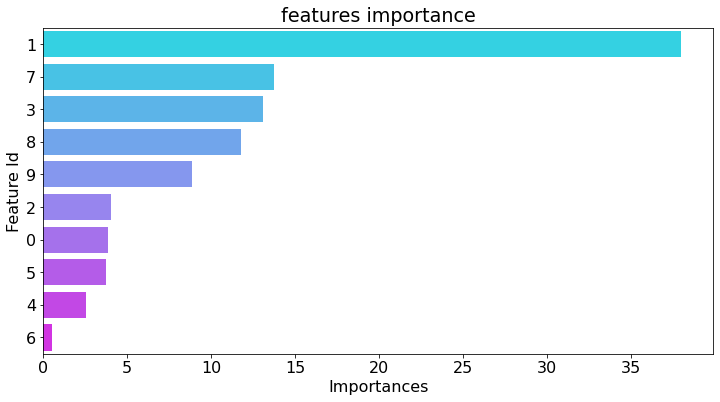

In [45]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [46]:
df_feature_importance

,Feature Id,Importances
0,1,37.967143
1,7,13.715115
2,3,13.080671
3,8,11.745537
4,9,8.837967
5,2,4.011100
6,0,3.824584
7,5,3.743409
8,4,2.550068
9,6,0.524407
